In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df =pd.read_csv('student.csv')
# Display basic information about the dataset
print("_______________________________________________________________________________________________________________________")
# print the info, head, and describe of the dataset
print(df.info())
print("_______________________________________________________________________________________________________________________")
print(df.head())
print("_______________________________________________________________________________________________________________________")
print(df.describe())
print("_______________________________________________________________________________________________________________________")
# Check for missing values
print(df.isnull().sum())
print("_______________________________________________________________________________________________________________________")
# shape of the dataset
print("Shape of the dataset:", df.shape)


_______________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   study_hours          25 non-null     float64
 1   attendance           25 non-null     int64  
 2   past_score           25 non-null     int64  
 3   internet_connection  25 non-null     object 
 4   sleep_hours          25 non-null     float64
 5   passed               25 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ KB
None
_______________________________________________________________________________________________________________________
   study_hours  attendance  past_score internet_connection  sleep_hours passed
0          1.5          55          40                  No          5.0     No
1          2.0          60       

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_connection'] = le.fit_transform(df['internet_connection']) # yes=1, no=0
df['passed'] = le.fit_transform(df['passed'])

print(df.dtypes)
print("_______________________________________________________________________________________________________________________")
print(df.head())

study_hours            float64
attendance               int64
past_score               int64
internet_connection      int64
sleep_hours            float64
passed                   int64
dtype: object
_______________________________________________________________________________________________________________________
   study_hours  attendance  past_score  internet_connection  sleep_hours  \
0          1.5          55          40                    0          5.0   
1          2.0          60          45                    0          5.5   
2          2.5          65          50                    1          6.0   
3          3.0          70          55                    1          6.0   
4          3.5          72          58                    1          6.5   

   passed  
0       0  
1       0  
2       0  
3       0  
4       0  


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]


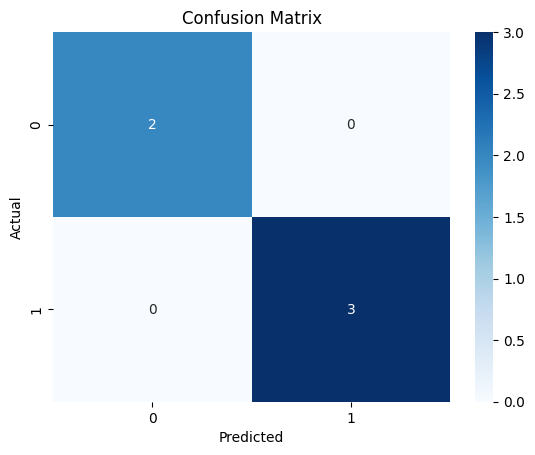

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student.csv')

le = LabelEncoder()
df['internet_connection'] = le.fit_transform(df['internet_connection']) # yes=1, no=0
df['passed'] = le.fit_transform(df['passed'])

features = ['study_hours', 'attendance', 'past_score','sleep_hours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df_scaled['passed']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_test,y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [28]:
print("__________________________Predictet Your Result__________________________")
try :
    study_hours = float(input("Enter your study hours: "))
    attendance = float(input("Enter your attendance percentage: "))
    past_score = float(input("Enter your past score: "))
    sleep_hours = float(input("Enter your sleep hours: "))
    input_data = np.array([[study_hours, attendance, past_score, sleep_hours]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    if prediction[0] == 1:
        print("Congratulations! You are likely to pass.")
    else:
        print("You may need to work harder to pass.")
except ValueError:
    print("Invalid input. Please enter numeric values for study hours, attendance, past score, and sleep hours.")

__________________________Predictet Your Result__________________________
Congratulations! You are likely to pass.


C:\Users\hetp3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hetp3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
